In [1]:
import json
import pandas as pd
from pathlib import Path

# --- Configuration ---
ROOT_DIR = Path('../../..//dataset/CESNET-TLS-Year22')

def get_json_files(root_path):
    """
    Crawls the directory using pathlib to find daily stats files.
    Excludes 'stats-week.json'.
    """
    # Recursive search for all stats-*.json files
    all_files = root_path.rglob('stats-*.json')
    
    # Filter out the weekly summary files based on filename
    daily_files = [f for f in all_files if 'stats-week' not in f.name]
    
    return list(daily_files)

def read_data(file_paths):
    """
    Reads JSON files, parses dates from filenames, and creates a DataFrame.
    """
    data_list = []
    
    for filepath in file_paths:
        try:
            with open(filepath, 'r') as f:
                content = json.load(f)
            
            # Extract date from filename (e.g., 'stats-20221029.json' -> '20221029')
            # .stem gives the filename without extension
            date_str = filepath.stem.replace('stats-', '')
            date_obj = pd.to_datetime(date_str, format='%Y%m%d')
            
            # Extract the 'apps' dictionary if it exists
            if 'apps' in content:
                row = content['apps'].copy()
                row['date'] = date_obj
                data_list.append(row)
                
        except Exception as e:
            print(f"Skipping {filepath.name}: {e}")
            
    # Create DataFrame
    df = pd.DataFrame(data_list)
    
    if not df.empty:
        # Set date as index and sort chronologically
        df = df.set_index('date').sort_index()
        
        # Fill missing values with 0 (crucial for sparse data)
        df = df.fillna(0)
        
    return df

# --- Main Execution ---
if __name__ == "__main__":
    files = get_json_files(ROOT_DIR)
    print(f"Found {len(files)} files.")
    
    df = read_data(files)
    
    if not df.empty:
        print("\nData loaded successfully:")
        # print(df.head())
        print(f"\nShape: {df.shape} (Rows, Columns)")
    else:
        print("No data found.")

Found 366 files.
Skipping stats-dataset.json: time data "dataset" doesn't match format "%Y%m%d", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

Data loaded successfully:

Shape: (365, 180) (Rows, Columns)


In [21]:
df_probs = df.div(df.sum(axis=1), axis=0)

In [24]:
df_probs

,google-ads,microsoft-update,tiktok,microsoft-settings,microsoft-diagnostic,teams,google-play,spotify,facebook-graph,office365,...,sumava-camdata,kb-ib,uzis-ocko,katastr-nahlizeni,adobe-search,thunderbird-telemetry,cesnet-filesender,cesnet-perun,ctu-kosapi,redmine
date,,,,,,,,,,,,,,,,,,,,,
2022-01-01,0.010528,0.038281,0.019038,0.034473,0.051070,0.031888,0.008590,0.012115,0.023169,0.023421,...,0.000000,0.000131,0.000433,0.000105,0.000006,0.000571,0.000074,0.000211,0.000101,0.000016
2022-01-02,0.010214,0.033091,0.026045,0.032492,0.043449,0.031580,0.009081,0.016101,0.029854,0.024470,...,0.000049,0.000158,0.000621,0.000071,0.000015,0.000571,0.000105,0.000299,0.000121,0.000007
2022-01-03,0.018320,0.027595,0.022205,0.016622,0.023690,0.027159,0.009008,0.015448,0.035391,0.031933,...,0.002353,0.000373,0.001441,0.000183,0.000016,0.003479,0.000059,0.000170,0.000060,0.000011
2022-01-04,0.026033,0.025120,0.025019,0.014055,0.022109,0.028040,0.008837,0.016846,0.037030,0.032230,...,0.006761,0.000249,0.001201,0.000168,0.000028,0.003009,0.000056,0.000129,0.000046,0.000011
2022-01-05,0.025727,0.035811,0.024432,0.015151,0.025516,0.029752,0.008435,0.015775,0.036141,0.031870,...,0.018025,0.000314,0.000987,0.000163,0.000049,0.002262,0.000050,0.000109,0.000035,0.000007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27,0.012965,0.041329,0.036927,0.035305,0.057326,0.029972,0.005666,0.002446,0.004640,0.041047,...,0.000089,0.000459,0.000057,0.000084,0.000002,0.000371,0.000137,0.000011,0.000068,0.001307
2022-12-28,0.029900,0.041748,0.029998,0.031042,0.058850,0.031426,0.010501,0.004066,0.004426,0.042367,...,0.000121,0.000395,0.000057,0.000095,0.000011,0.001473,0.000133,0.000030,0.000034,0.001127
2022-12-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: title={'center': 'Application Usage Probabilities Over Time'}, xlabel='date'>

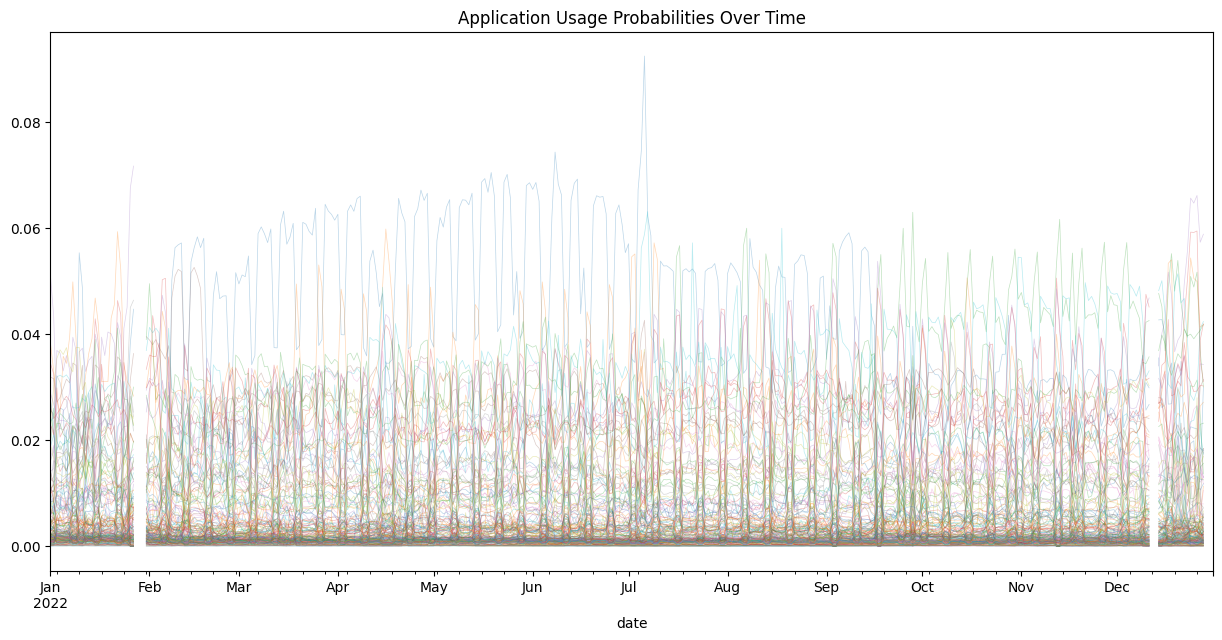

In [23]:
df_probs.plot(figsize=(15, 7), legend=False, alpha=0.3, linewidth=0.5, title='Application Usage Probabilities Over Time')


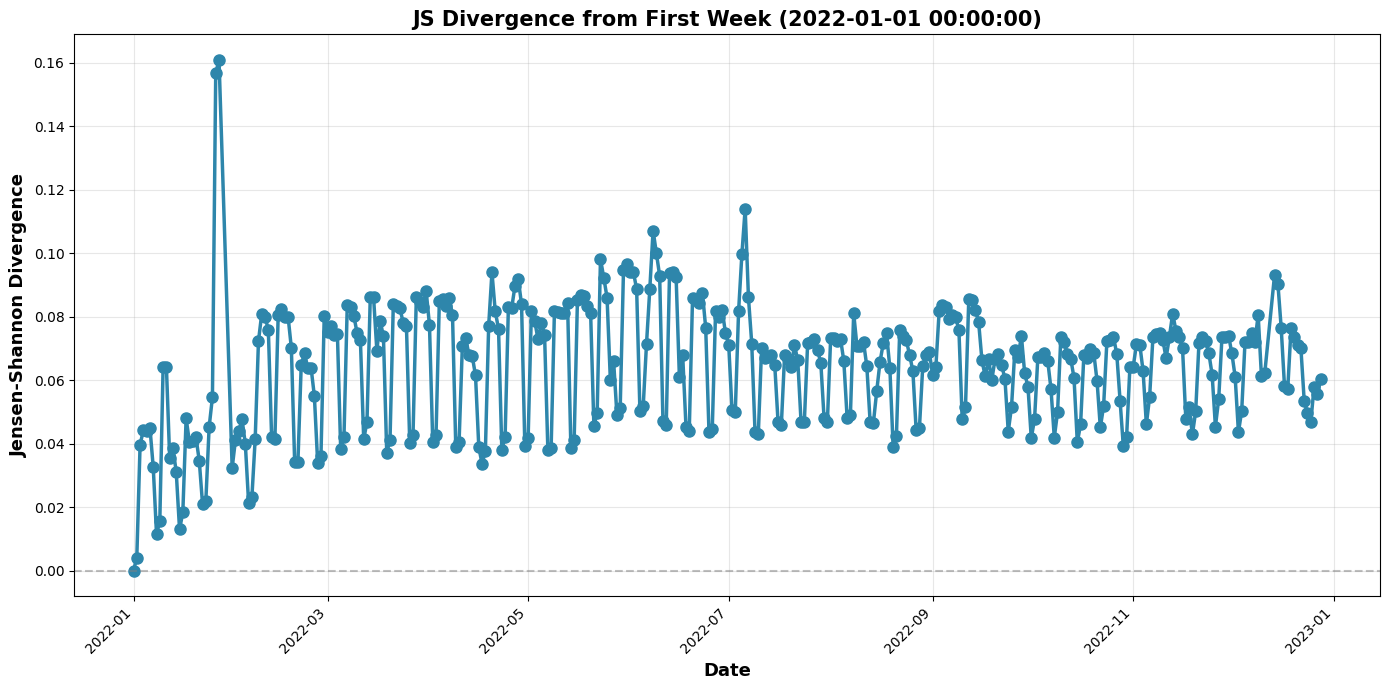

            js_divergence
date                     
2022-01-01       0.000000
2022-01-02       0.004034
2022-01-03       0.039668
2022-01-04       0.044190
2022-01-05       0.043985
...                   ...
2022-12-24       0.049549
2022-12-25       0.046760
2022-12-26       0.057864
2022-12-27       0.055583
2022-12-28       0.060257

[357 rows x 1 columns]


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon

# Assuming your DataFrame is df_probs with date as index
# All columns are probability columns

# Get all probability columns
prob_columns = df_probs.columns.tolist()

# Get first week as reference
first_week_probs = df_probs.iloc[0].values.astype(float)
first_week_date = df_probs.index[0]

# Compute JS divergence for each week
js_divergences = []
dates = []

for date, row in df_probs.iterrows():
    current_probs = row.values.astype(float)
    
    # Skip rows with NaN
    if np.any(np.isnan(current_probs)):
        continue
    
    # Compute JS divergence (square the distance to get divergence)
    js_distance = jensenshannon(first_week_probs, current_probs)
    js_divergence = js_distance ** 2
    
    js_divergences.append(js_divergence)
    dates.append(date)

# Plot
plt.figure(figsize=(14, 7))
plt.plot(dates, js_divergences, marker='o', linewidth=2.5, markersize=8, color='#2E86AB')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Jensen-Shannon Divergence', fontsize=13, fontweight='bold')
plt.title(f'JS Divergence from First Week ({first_week_date})', 
          fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('js_divergence_plot.png', dpi=300, bbox_inches='tight')
plt.show()

# Create results DataFrame
results = pd.DataFrame({'date': dates, 'js_divergence': js_divergences})
results.set_index('date', inplace=True)
print(results)

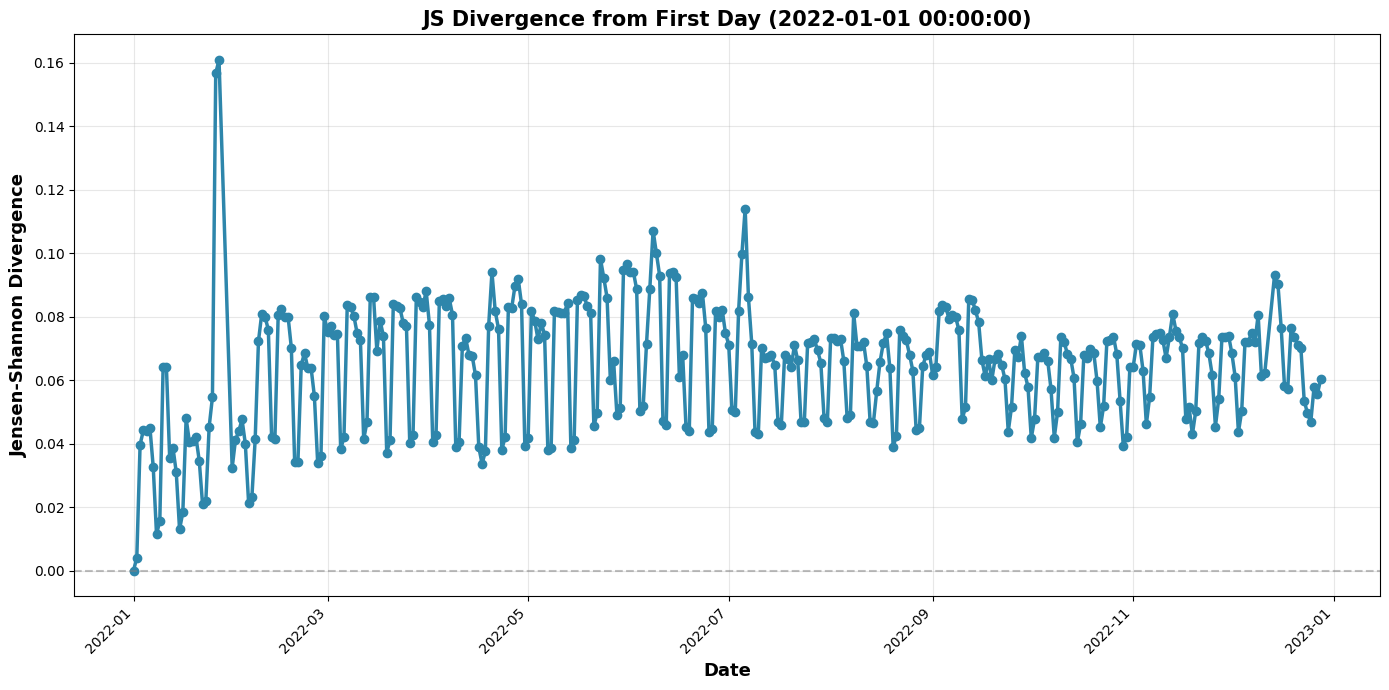

            js_divergence
date                     
2022-01-01       0.000000
2022-01-02       0.004034
2022-01-03       0.039668
2022-01-04       0.044190
2022-01-05       0.043985
...                   ...
2022-12-24       0.049549
2022-12-25       0.046760
2022-12-26       0.057864
2022-12-27       0.055583
2022-12-28       0.060257

[357 rows x 1 columns]


In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon

# Assuming your DataFrame is df_probs with date as index
# All columns are probability columns

# Get all probability columns
prob_columns = df_probs.columns.tolist()

# Get first DAY as reference (instead of first week)
first_day_probs = df_probs.iloc[0].values.astype(float)
first_day_date = df_probs.index[0]

# Compute JS divergence for each day
js_divergences = []
dates = []

for date, row in df_probs.iterrows():
    current_probs = row.values.astype(float)
    
    # Skip rows with NaN
    if np.any(np.isnan(current_probs)):
        continue
    
    # Compute JS divergence (square the distance to get divergence)
    js_distance = jensenshannon(first_day_probs, current_probs)
    js_divergence = js_distance ** 2
    
    js_divergences.append(js_divergence)
    dates.append(date)

# Plot
plt.figure(figsize=(14, 7))
plt.plot(dates, js_divergences, marker='o', linewidth=2.5, markersize=6, color='#2E86AB')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Date', fontsize=13, fontweight='bold')
plt.ylabel('Jensen-Shannon Divergence', fontsize=13, fontweight='bold')
plt.title(f'JS Divergence from First Day ({first_day_date})', 
          fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('js_divergence_from_first_day.png', dpi=300, bbox_inches='tight')
plt.show()

# Create results DataFrame
results = pd.DataFrame({'date': dates, 'js_divergence': js_divergences})
results.set_index('date', inplace=True)
print(results)

In [33]:
df.sum(axis=1).sum()

507739073.0

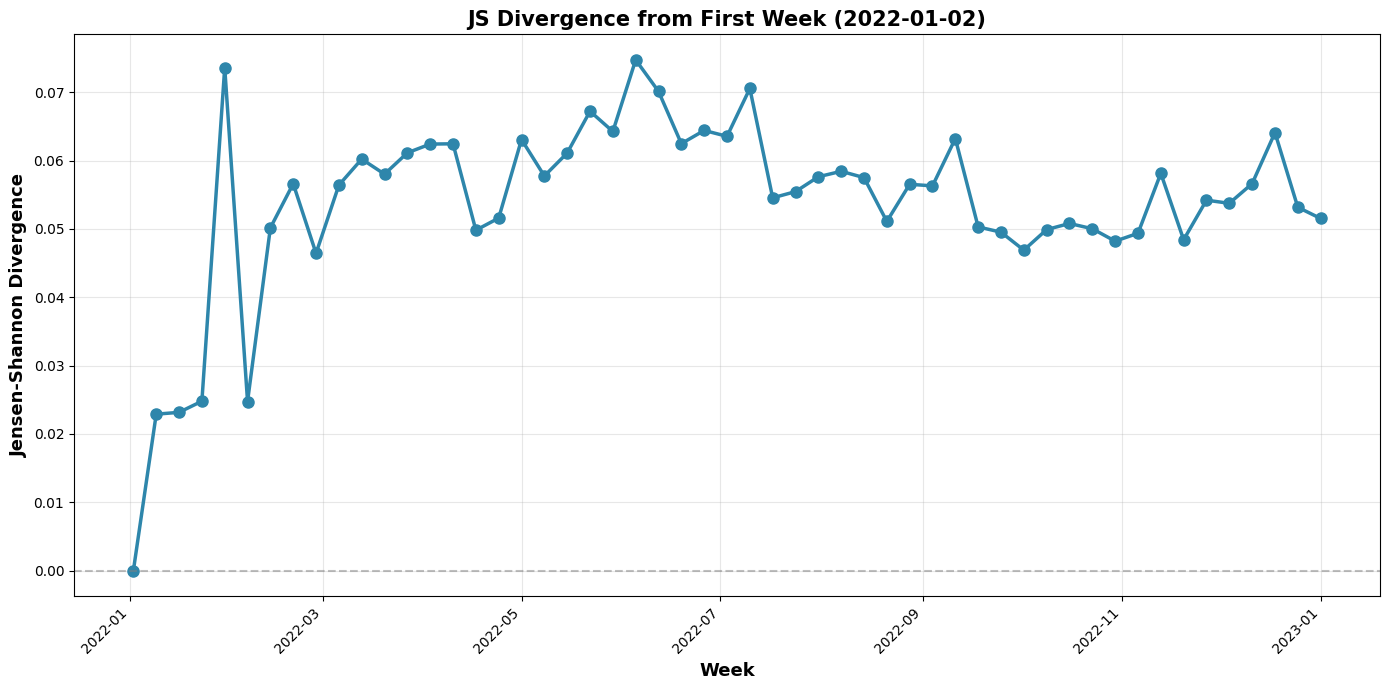

            js_divergence
week                     
2022-01-02       0.000000
2022-01-09       0.022889
2022-01-16       0.023154
2022-01-23       0.024786
2022-01-30       0.073620
2022-02-06       0.024740
2022-02-13       0.050160
2022-02-20       0.056618
2022-02-27       0.046432
2022-03-06       0.056412
2022-03-13       0.060224
2022-03-20       0.058020
2022-03-27       0.061144
2022-04-03       0.062422
2022-04-10       0.062463
2022-04-17       0.049816
2022-04-24       0.051590
2022-05-01       0.063089
2022-05-08       0.057750
2022-05-15       0.061111
2022-05-22       0.067226
2022-05-29       0.064262
2022-06-05       0.074747
2022-06-12       0.070135
2022-06-19       0.062486
2022-06-26       0.064416
2022-07-03       0.063557
2022-07-10       0.070559
2022-07-17       0.054553
2022-07-24       0.055461
2022-07-31       0.057637
2022-08-07       0.058436
2022-08-14       0.057514
2022-08-21       0.051100
2022-08-28       0.056538
2022-09-04       0.056303
2022-09-11  

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import jensenshannon

# Assuming your DataFrame is df_probs with date as index
# All columns are probability columns

# Aggregate by week - sum the probabilities for each week
df_weekly = df_probs.resample('W').sum()

# Normalize each week so probabilities sum to 1 (or maintain same scale)
# If your original daily probs don't sum to 1, you might want to normalize:
# df_weekly = df_weekly.div(df_weekly.sum(axis=1), axis=0)

# Get all probability columns
prob_columns = df_weekly.columns.tolist()

# Get first week as reference
first_week_probs = df_weekly.iloc[0].values.astype(float)
first_week_date = df_weekly.index[0]

# Compute JS divergence for each week
js_divergences = []
dates = []

for date, row in df_weekly.iterrows():
    current_probs = row.values.astype(float)
    
    # Skip rows with NaN
    if np.any(np.isnan(current_probs)):
        continue
    
    # Compute JS divergence (square the distance to get divergence)
    js_distance = jensenshannon(first_week_probs, current_probs)
    js_divergence = js_distance ** 2
    
    js_divergences.append(js_divergence)
    dates.append(date)

# Plot
plt.figure(figsize=(14, 7))
plt.plot(dates, js_divergences, marker='o', linewidth=2.5, markersize=8, color='#2E86AB')
plt.axhline(y=0, color='gray', linestyle='--', alpha=0.5)
plt.xlabel('Week', fontsize=13, fontweight='bold')
plt.ylabel('Jensen-Shannon Divergence', fontsize=13, fontweight='bold')
plt.title(f'JS Divergence from First Week ({first_week_date.strftime("%Y-%m-%d")})', 
          fontsize=15, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('js_divergence_weekly.png', dpi=300, bbox_inches='tight')
plt.show()

# Create results DataFrame
results = pd.DataFrame({'week': dates, 'js_divergence': js_divergences})
results.set_index('week', inplace=True)
print(results)
print(f"\nNumber of weeks: {len(results)}")
print(f"Mean JS divergence: {results['js_divergence'].mean():.6f}")
print(f"Max JS divergence: {results['js_divergence'].max():.6f}")

In [11]:
from pathlib import Path
from data_utils.csv_dataloader import create_csv_flowpic_loader
import json

# Setup paths
ROOT_DIR = Path('../../../dataset/CESNET-TLS-Year22')
csv_files = list(ROOT_DIR.rglob('*.csv.xz'))[:5]

# Load label mapping from JSON file
with open(ROOT_DIR / 'label_mapping.json', 'r') as f:
    label_mapping = json.load(f)

# Create dataloader with progress bar and subsampling
loader = create_csv_flowpic_loader(
    csv_paths=csv_files,
    batch_size=64,
    label_mapping=label_mapping,  # Load from JSON file
    sample_frac=0.01,  # Sample 1% of data (optional)
    verbose=True,  # Show progress bar (optional)
    dataset_format='auto',  # Auto-detect CESNET format
    num_workers=4
)

print(f"Dataset size: {len(loader.dataset)} samples")

# Use the dataloader
for x, y in loader:
    # x: (batch_size, 1500, 1500) flowpics
    # y: (batch_size,) labels
    print(f"Batch X shape: {x.shape}, Batch Y shape: {y.shape}")
    break


Loading CSV files: 100%|██████████| 5/5 [02:04<00:00, 24.83s/it, total_samples=91837]

Dataset size: 91837 samples


Batch X shape: torch.Size([64, 1500, 1500]), Batch Y shape: torch.Size([64])
